# Assimilating pseudoPAGES2k generated from iCESM

**Expected time to run through: 3 hours**

This tutorial demonstrates how to perform a pseudoproxy experiment with LMRt.
We will assimilate pseudoPAGES2k records generated as nearest gridcell of the iCESM temperature plus white noise with `SNR=1`.
Then we use the iCESM temperature field as the prior, as well as the instrumental observation for calibration of the PSM.
For the details about the pseudoproxy generateion, please refer to the [tutorial notebook on how to generate pseudoproxies](https://fzhu2e.github.io/LMRt/tutorial/howto_gen-pseudoproxies.html).

## Test data preparation

To go through this tutorial, please prepare test data following the steps:
1. Download the test case named "pseudoPAGES2k_iCESM" with this [link](https://drive.google.com/drive/folders/1NKL99Rkgn6YVQn2Pt_2GyxtIBoMm2CVu?usp=sharing).
2. Create a directory named "testcases" in the same directory where this notebook sits.
3. Put the unzipped direcotry "pseudoPAGES2k_iCESM" into "testcases".

Below, we first load some useful packages, including our `LMRt`.

In [1]:
%load_ext autoreload
%autoreload 2

import LMRt
import GraphEM
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as  plt
from tqdm import tqdm

## Data Assimilation

In [7]:
job = LMRt.ReconJob()
job.load_configs(cfg_path='./testcases/pseudoPAGES2k_iCESM/configs.yml', verbose=True)

LMRt: job.load_configs() >>> loading reconstruction configurations from: ./testcases/pseudoPAGES2k_iCESM/configs.yml
LMRt: job.load_configs() >>> job.configs created
LMRt: job.load_configs() >>> job.configs["job_dirpath"] = /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon
LMRt: job.load_configs() >>> /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon created
{'anom_period': [1951, 1980],
 'job_dirpath': '/Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon',
 'job_id': 'LMRt_quickstart',
 'obs_path': {'tas': './data/model/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc'},
 'obs_varname': {'tas': 'tas'},
 'prior_path': {'tas': './data/model/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc'},
 'prior_regrid_ntrunc': 42,
 'prior_season': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'prior_varname': {'tas': 'tas'},
 'proxy_frac': 0.75,
 'proxydb_path': './data/proxy/pseudoPAGES2k_dataset_tas_wn.pkl',
 'psm

In [8]:
job.load_proxydb(verbose=True)

LMRt: job.load_proxydb() >>> job.configs["proxydb_path"] = /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/data/proxy/pseudoPAGES2k_dataset_tas_wn.pkl
LMRt: job.load_proxydb() >>> 692 records loaded
LMRt: job.load_proxydb() >>> job.proxydb created


In [9]:
job.filter_proxydb(verbose=True)

LMRt: job.filter_proxydb() >>> filtering proxy records according to: ['tree.TRW', 'tree.MXD', 'coral.d18O', 'coral.SrCa', 'coral.calc', 'ice.d18O', 'ice.dD']
LMRt: job.filter_proxydb() >>> 546 records remaining


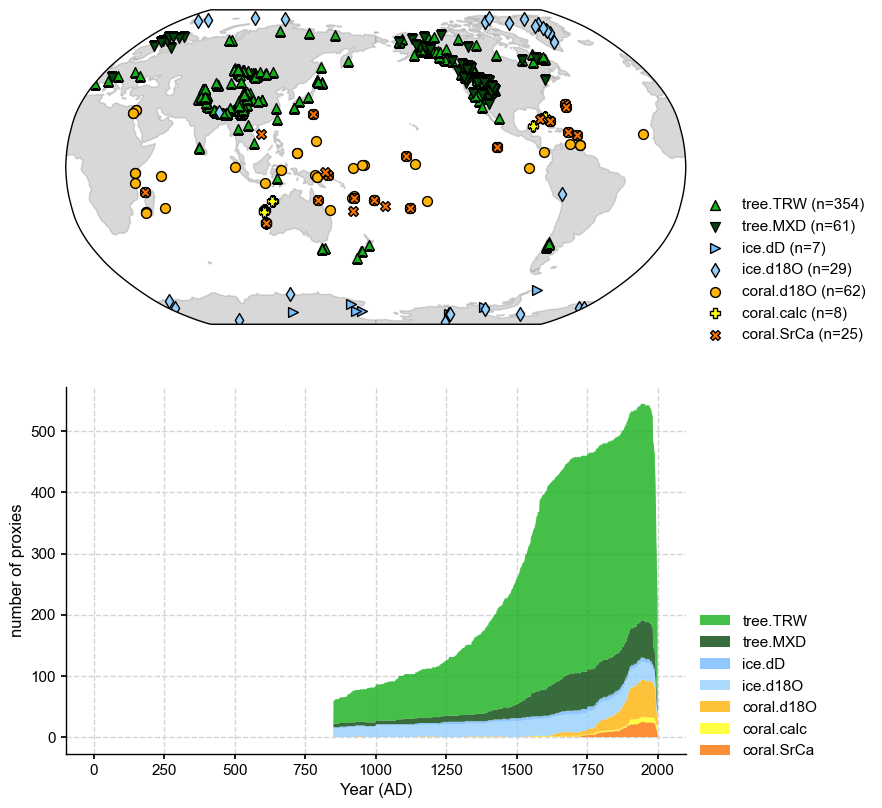

In [10]:
fig, ax = job.proxydb.plot()

In [11]:
job.load_prior(verbose=True)

LMRt: job.load_prior() >>> loading model prior fields from: {'tas': '/Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/data/model/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc'}
LMRt: job.load_prior() >>> raw prior
Dataset Overview
-----------------------

     Name:  tas
   Source:  /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/data/model/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc
    Shape:  time:13872, lat:96, lon:144
LMRt: job.load_prior() >>> job.prior created


In [12]:
job.load_obs(verbose=True)

LMRt: job.load_obs() >>> loading instrumental observation fields from: {'tas': '/Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/data/model/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc'}
LMRt: job.load_obs() >>> job.obs created


In [13]:
%%time
job_dirpath = job.configs['job_dirpath']
seasonalized_prior_path = os.path.join(job_dirpath, 'seasonalized_prior.pkl')
seasonalized_obs_path = os.path.join(job_dirpath, 'seasonalized_obs.pkl')
prior_loc_path = os.path.join(job_dirpath, 'prior_loc.pkl')
obs_loc_path = os.path.join(job_dirpath, 'obs_loc.pkl')
calibed_psm_path = os.path.join(job_dirpath, 'calibed_psm.pkl')

job.calibrate_psm(
    seasonalized_prior_path=seasonalized_prior_path,
    seasonalized_obs_path=seasonalized_obs_path,
    prior_loc_path=prior_loc_path,
    obs_loc_path=obs_loc_path,
    calibed_psm_path=calibed_psm_path,
    verbose=True,
)

LMRt: job.calibrate_psm() >>> job.configs["precalc"]["seasonalized_prior_path"] = /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/seasonalized_prior.pkl
LMRt: job.calibrate_psm() >>> job.configs["precalc"]["seasonalized_obs_path"] = /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/seasonalized_obs.pkl
LMRt: job.calibrate_psm() >>> job.configs["precalc"]["prior_loc_path"] = /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/prior_loc.pkl
LMRt: job.calibrate_psm() >>> job.configs["precalc"]["obs_loc_path"] = /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/obs_loc.pkl
LMRt: job.calibrate_psm() >>> job.configs["precalc"]["calibed_psm_path"] = /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/calibed_psm.pkl
LMRt: job.seasonalize_ds_for_psm() >>> job.configs["ptype_season"] = {'tree.TRW': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'tree.MXD': [1, 2, 3, 4, 5, 6,

Searching nearest location:   2%|▏         | 9/546 [00:00<00:06, 86.50it/s]

LMRt: job.seasonalize_ds_for_psm() >>> job.seasonalized_prior created


Searching nearest location: 100%|██████████| 546/546 [00:05<00:00, 101.94it/s]


LMRt: job.proxydb.find_nearest_loc() >>> job.proxydb.prior_lat_idx & job.proxydb.prior_lon_idx created
LMRt: job.proxydb.get_var_from_ds() >>> job.proxydb.records[pid].prior_time & job.proxydb.records[pid].prior_value created
LMRt: job.seasonalize_ds_for_psm() >>> job.configs["ptype_season"] = {'tree.TRW': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'tree.MXD': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'coral.d18O': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'coral.SrCa': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'coral.calc': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'ice.d18O': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'ice.dD': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}
LMRt: job.seasonalize_ds_for_psm() >>> Seasonalizing variables from obs with season: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


Searching nearest location:   2%|▏         | 9/546 [00:00<00:06, 85.01it/s]

LMRt: job.seasonalize_ds_for_psm() >>> job.seasonalized_obs created


Calibrating PSM:   1%|▏         | 7/546 [00:00<00:08, 65.00it/s]

LMRt: job.proxydb.find_nearest_loc() >>> job.proxydb.obs_lat_idx & job.proxydb.obs_lon_idx created
LMRt: job.proxydb.get_var_from_ds() >>> job.proxydb.records[pid].obs_time & job.proxydb.records[pid].obs_value created
LMRt: job.proxydb.init_psm() >>> job.proxydb.records[pid].psm initialized
LMRt: job.calibrate_psm() >>> PSM calibration period: [1850, 2015]


Calibrating PSM:  50%|█████     | 274/546 [00:03<00:03, 79.73it/s]

The number of overlapped data points is 0 < 25. Skipping ...


Calibrating PSM: 100%|██████████| 546/546 [00:07<00:00, 75.27it/s]


LMRt: job.proxydb.calib_psm() >>> job.proxydb.records[pid].psm calibrated
LMRt: job.proxydb.calib_psm() >>> job.proxydb.calibed created
CPU times: user 30.2 s, sys: 2.43 s, total: 32.6 s
Wall time: 33.1 s


In [14]:
job.forward_psm(verbose=True)

Forwarding PSM: 100%|██████████| 546/546 [00:00<00:00, 563.97it/s]

LMRt: job.proxydb.forward_psm() >>> job.proxydb.records[pid].psm forwarded


In [15]:
job.seasonalize_prior(verbose=True)
job.regrid_prior(verbose=True)

LMRt: job.seasonalize_prior() >>> seasonalized prior w/ season [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Dataset Overview
-----------------------

     Name:  tas
   Source:  /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/data/model/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc
    Shape:  time:1156, lat:96, lon:144
LMRt: job.seasonalize_prior() >>> job.prior updated
LMRt: job.regrid_prior() >>> regridded prior
Dataset Overview
-----------------------

     Name:  tas
   Source:  /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/data/model/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc
    Shape:  time:1156, lat:42, lon:63
LMRt: job.regrid_prior() >>> job.prior updated


In [16]:
job.save()

In [30]:
%%time
job.run(verbose=True)

LMRt: job.run() >>> job.configs["recon_seeds"] = [7 8 9]
LMRt: job.run() >>> job.configs["save_settings"] = {'compress_dict': {'zlib': True, 'least_significant_digit': 1}, 'output_geo_mean': False, 'target_lats': [], 'target_lons': [], 'output_full_ens': False, 'dtype': 32}
LMRt: job.run() >>> job.configs saved to: /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/job_configs.yml
LMRt: job.run() >>> seed: 7 | max: 9


KF updating:   1%|          | 18/2001 [00:00<00:11, 175.67it/s]

LMRt: job.run() >>> randomized indices for prior and proxies saved to: /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/job_r07_idx.pkl
Proxy Database Overview
-----------------------
     Source:        /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/data/proxy/pseudoPAGES2k_dataset_tas_wn.pkl
       Size:        408
Proxy types:        {'tree.TRW': 268, 'tree.MXD': 45, 'coral.d18O': 46, 'coral.SrCa': 19, 'ice.d18O': 20, 'coral.calc': 6, 'ice.dD': 4}


KF updating: 100%|██████████| 2001/2001 [22:07<00:00,  1.51it/s]


LMRt: job.save_recon() >>> Reconstructed fields saved to: /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/job_r07_recon.nc
LMRt: job.run() >>> seed: 8 | max: 9


KF updating:   1%|▏         | 29/2001 [00:00<00:13, 147.90it/s]

LMRt: job.run() >>> randomized indices for prior and proxies saved to: /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/job_r08_idx.pkl
Proxy Database Overview
-----------------------
     Source:        /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/data/proxy/pseudoPAGES2k_dataset_tas_wn.pkl
       Size:        408
Proxy types:        {'tree.MXD': 46, 'tree.TRW': 261, 'coral.calc': 5, 'coral.d18O': 50, 'coral.SrCa': 20, 'ice.d18O': 20, 'ice.dD': 6}


KF updating: 100%|██████████| 2001/2001 [20:55<00:00,  1.59it/s]


LMRt: job.save_recon() >>> Reconstructed fields saved to: /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/job_r08_recon.nc
LMRt: job.run() >>> seed: 9 | max: 9


KF updating:   2%|▏         | 36/2001 [00:00<00:11, 177.56it/s]

LMRt: job.run() >>> randomized indices for prior and proxies saved to: /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/job_r09_idx.pkl
Proxy Database Overview
-----------------------
     Source:        /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/data/proxy/pseudoPAGES2k_dataset_tas_wn.pkl
       Size:        408
Proxy types:        {'tree.TRW': 270, 'tree.MXD': 44, 'coral.calc': 8, 'coral.d18O': 41, 'ice.d18O': 20, 'coral.SrCa': 20, 'ice.dD': 5}


KF updating: 100%|██████████| 2001/2001 [19:56<00:00,  1.67it/s]


LMRt: job.save_recon() >>> Reconstructed fields saved to: /Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/job_r09_recon.nc
LMRt: job.run() >>> DONE!
CPU times: user 7h 44min 6s, sys: 24min 4s, total: 8h 8min 11s
Wall time: 1h 5min 46s


## Validation

In [31]:
# create the res object for reconstruction results
res = LMRt.ReconRes(job.configs['job_dirpath'], verbose=True)

recon_paths: ['/Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/job_r00_recon.nc', '/Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/job_r01_recon.nc', '/Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/job_r02_recon.nc', '/Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/job_r03_recon.nc', '/Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/job_r04_recon.nc', '/Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/job_r05_recon.nc', '/Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/job_r06_recon.nc', '/Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/job_r07_recon.nc', '/Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/job_r08_recon.nc', '/Users/fzhu/Github/LMRt/docsrc/tutorial/testcases/pseudoPAGES2k_iCESM/recon/job_r09_recon.nc']
idx_paths: ['/Users/fzhu/G

In [32]:
# get the varialbes from the recon_paths
res.get_vars(['tas', 'nino3.4'], verbose=True)

LMRt: res.get_var() >>> loading variable: tas
LMRt: res.get_var() >>> loading variable: nino3.4
LMRt: res.get_var() >>> res.vars filled w/ varnames: ['tas', 'nino3.4'] and ['year', 'lat', 'lon']


### R$^2$(reconstruction, iCESM)

In [33]:
ds = LMRt.Dataset().load_nc(
    {'tas':'./testcases/pseudoPAGES2k_iCESM/data/model/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc'},
    anom_period=[1951, 1980],
    varname_dict={'tas': 'tas'}
)
target_fd = ds.fields['tas']
target_fd = target_fd.seasonalize(list(range(1, 13)))

Calculating metric: R2: 100%|██████████| 42/42 [00:22<00:00,  1.85it/s]
/Users/fzhu/Apps/miniconda3/envs/LMRt/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/fzhu/Apps/miniconda3/envs/LMRt/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/fzhu/Github/LMRt/LMRt/visual.py:266: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(im, ax=ax, orientation=cbar_orientation, pad=cbar_pad, aspect=cbar_aspect, extend=extend,


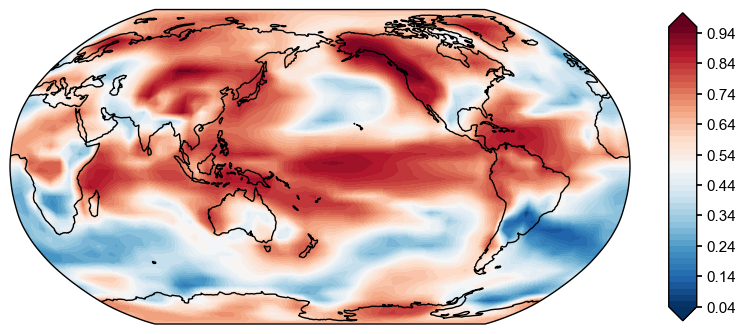

In [34]:
corr_fd = res.vars['tas'].validate(target_fd, stat='R2')
fig, ax = corr_fd.plot()

### R$^2$(reconstruction, proxies)

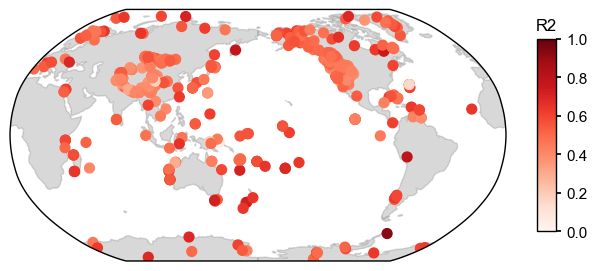

In [35]:
fig, ax = res.vars['tas'].validate(job.proxydb, stat='R2').plot()